In [2]:
!pip install ucimlrepo

##1. Install the ucimlrepo Package and Fetch the Dataset

Install ucimlrepo and fetch the breast cancer dataset using the fetch_ucirepo method. The features and target labels are stored in X and y.

In [13]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# Fetch the dataset (Breast Cancer dataset)
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# Metadata
print(breast_cancer_wisconsin_original.metadata)

# Variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

##2. Display the First Few Rows of Data

This step is used to check the first few rows of the feature data X and the target labels y.

In [14]:
import pandas as pd

# Display the first few rows of the data (X)
print(X.head())  # or .tail() for the last rows

# Display the first few rows of the labels (y)
print(y.head())


   Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   

   Bland_chromatin  Normal_nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2                3     

##3.  Load the Dataset and Split 70/30 (Training/Test)

Now, the dataset is split 70% for training and 30% for testing.

In [15]:
# Load the dataset
from ucimlrepo import fetch_ucirepo

breast_cancer_wisconsin_original = fetch_ucirepo(id=15)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# Split data into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the sizes of the training and test sets
print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Train set size: 489
Test set size: 210


##4. Normalize the Data

Normalize the training and test data to have a mean of 0 and variance of 1 using StandardScaler.

In [16]:
from sklearn.preprocessing import StandardScaler

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 5. Visualize the Data (2D and 3D Plots)

### 5.1 2D Scatter Plot of Feature Combinations

This creates scatter plots of pairs of features to visually inspect relationships between them.

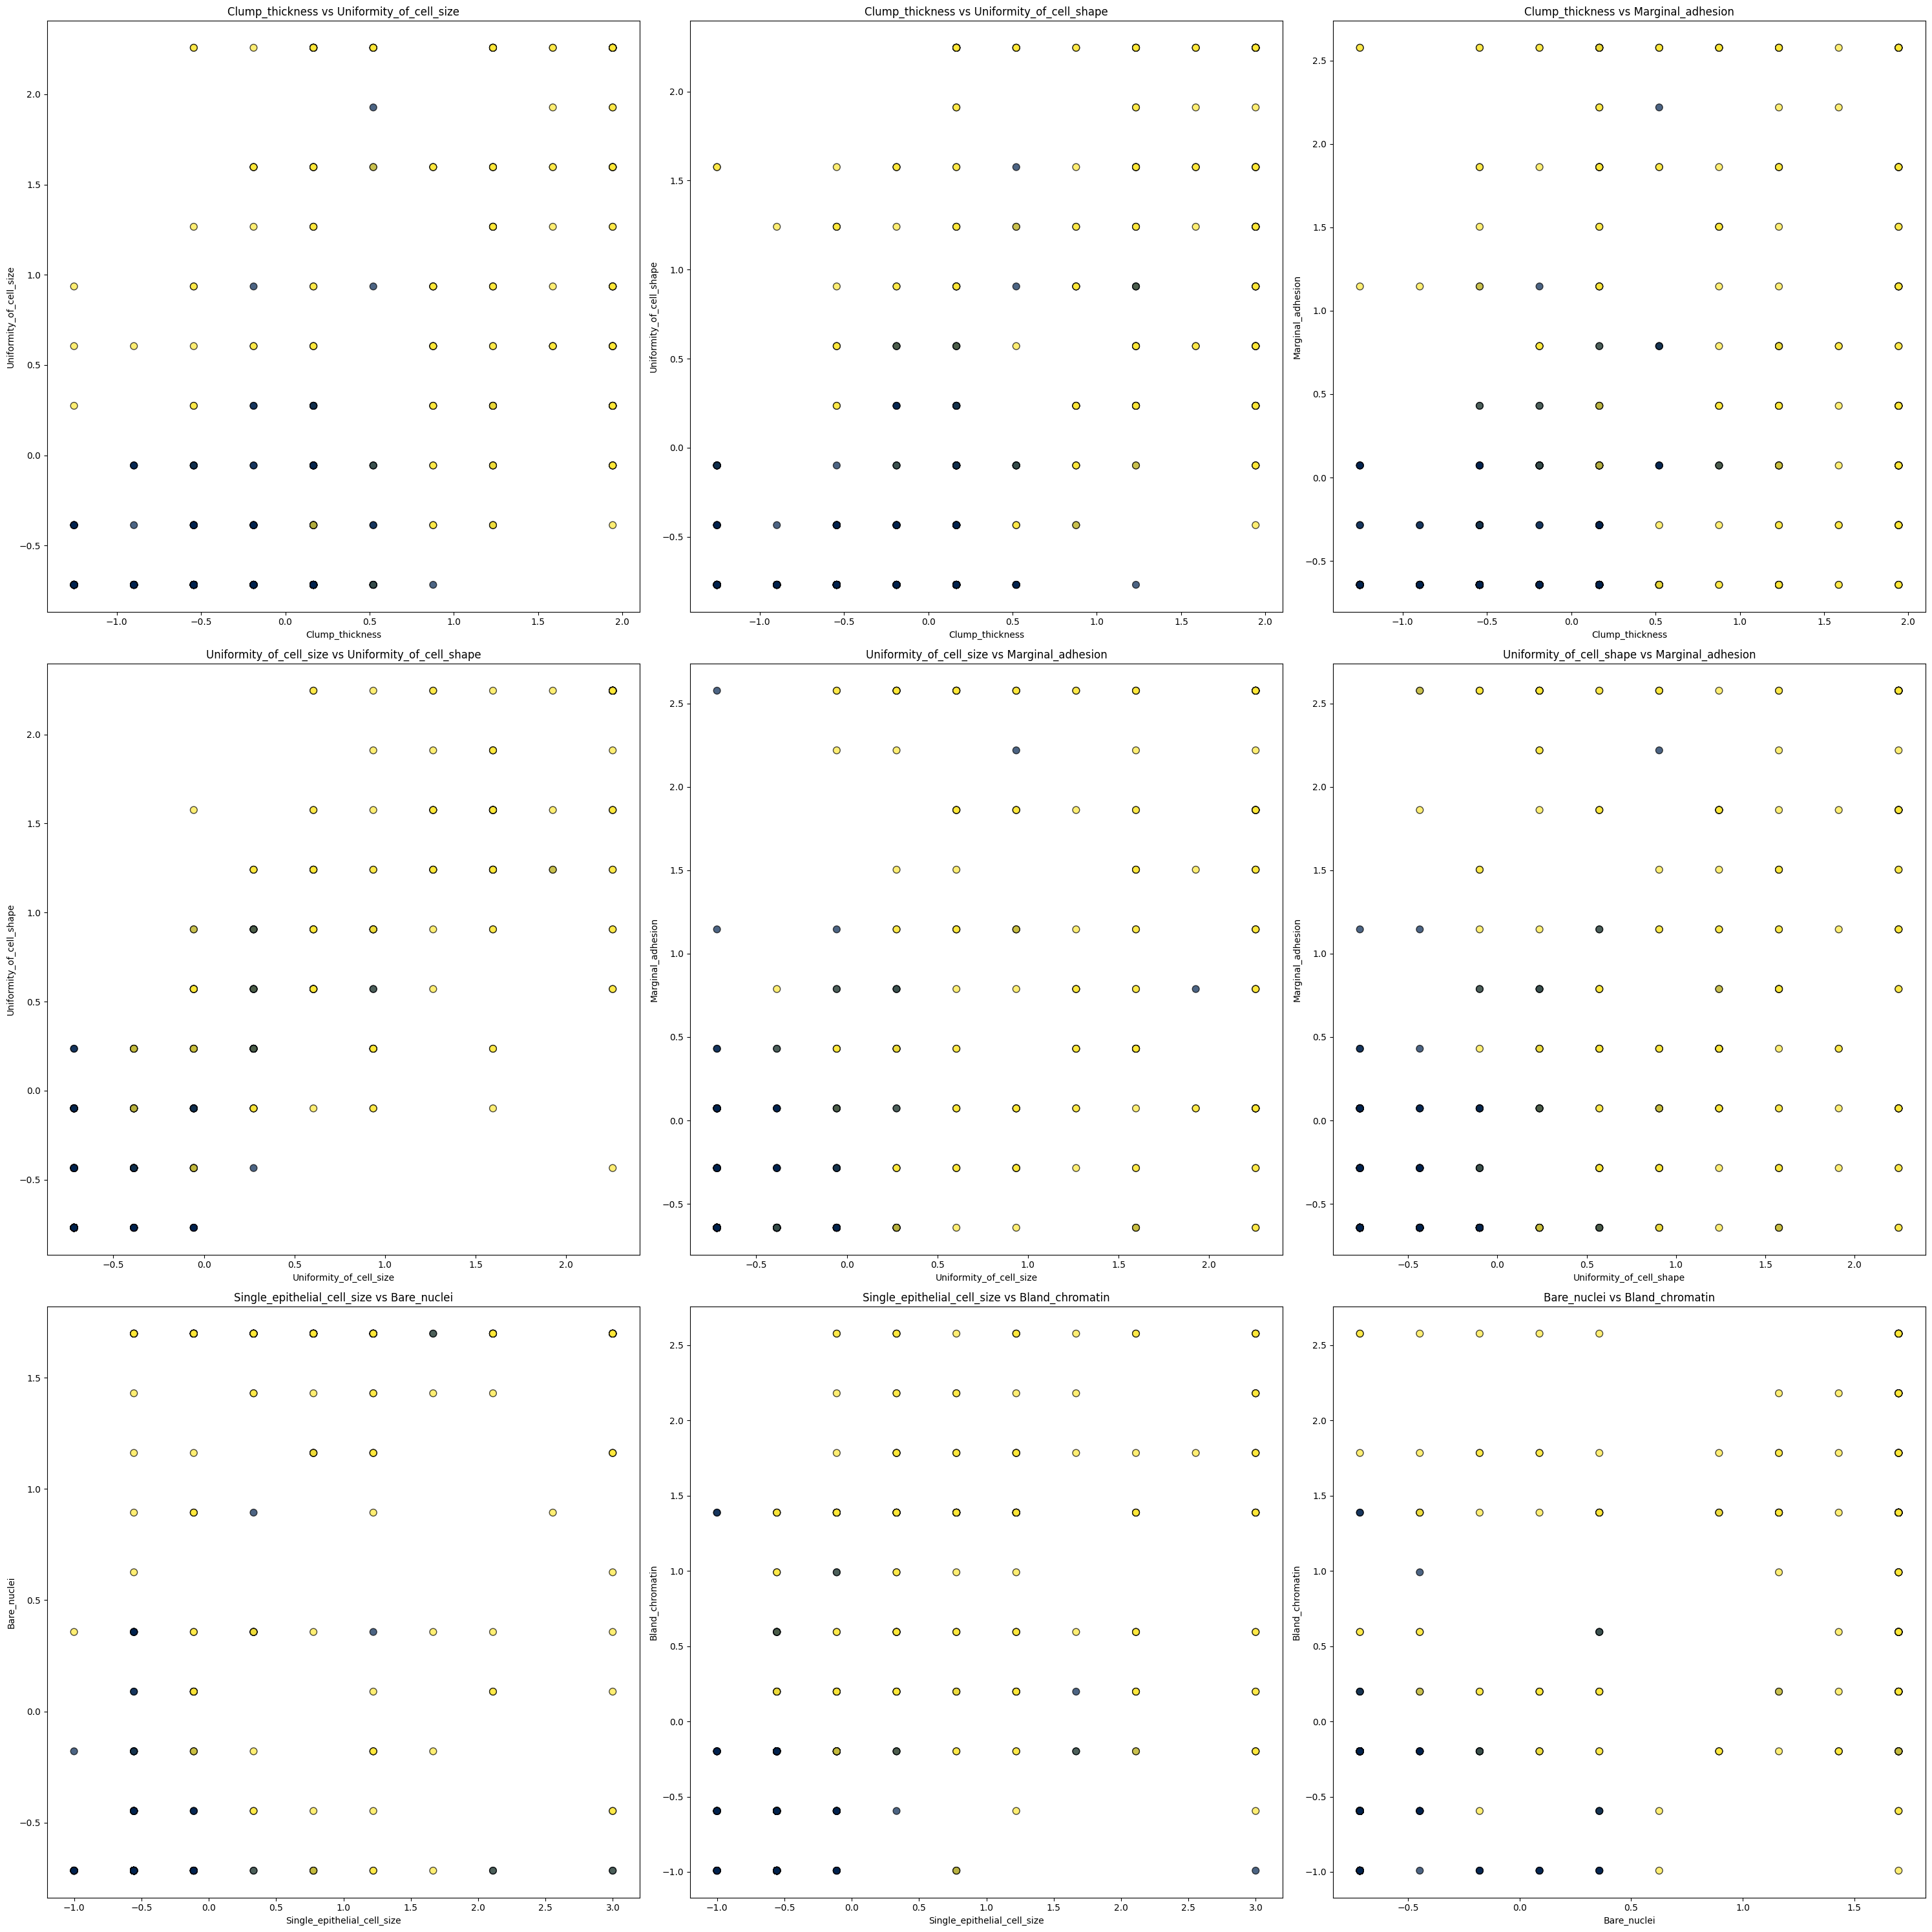

In [17]:
import matplotlib.pyplot as plt

# Create a figure for plotting
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

# Create feature combinations
combinations = [
    (0, 1), (0, 2), (0, 3),
    (1, 2), (1, 3), (2, 3),
    (4, 5), (4, 6), (5, 6)
]

# Scatter plot for each feature pair
plot_idx = 0
for (i, j) in combinations:
    row = plot_idx // 3
    col = plot_idx % 3
    axes[row, col].scatter(X_train_scaled[:, i], X_train_scaled[:, j], c=y_train.values, cmap='cividis', edgecolors='k', alpha=0.7, s=60)
    axes[row, col].set_title(f'{X.columns[i]} vs {X.columns[j]}')
    axes[row, col].set_xlabel(X.columns[i])
    axes[row, col].set_ylabel(X.columns[j])
    plot_idx += 1

# Show the plot
plt.tight_layout()
plt.show()


### 5.2 3D Scatter Plot of Feature Combinations

This creates 3D scatter plots for triplets of features to visualize interactions between multiple features.

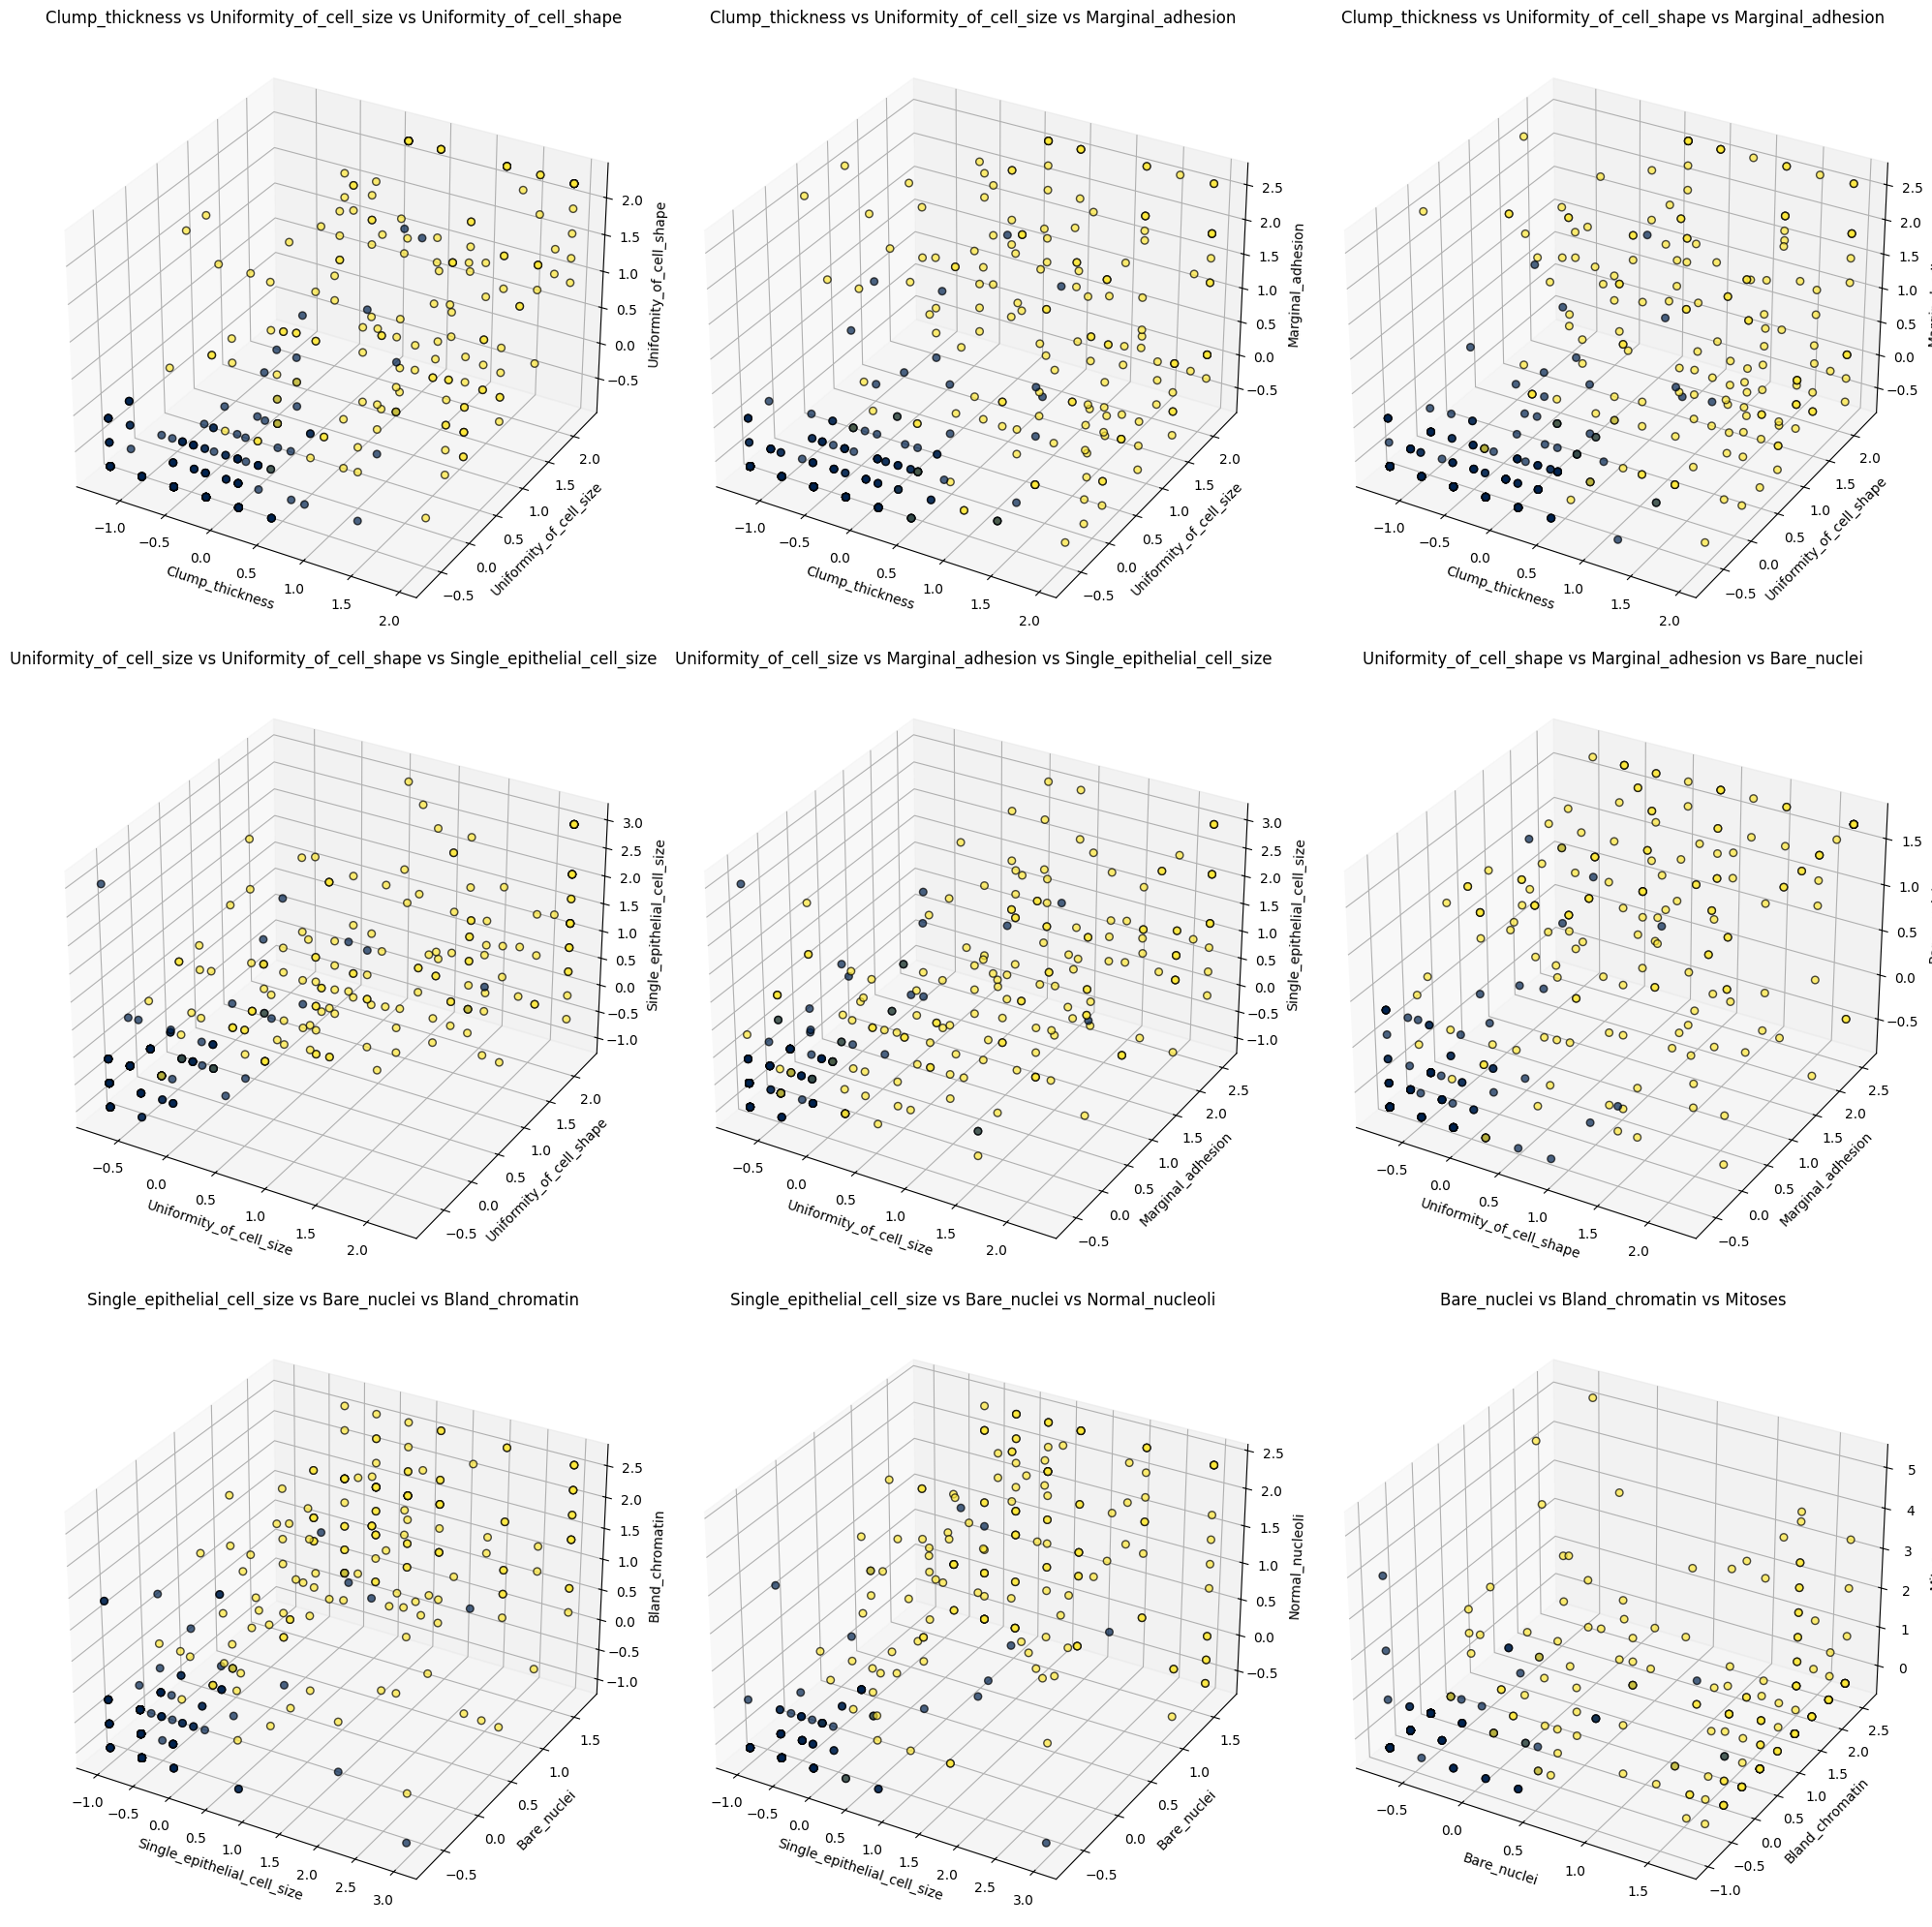

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(20, 20))

# Create feature combinations for 3D
combinations = [
    (0, 1, 2), (0, 1, 3), (0, 2, 3),
    (1, 2, 4), (1, 3, 4), (2, 3, 5),
    (4, 5, 6), (4, 5, 7), (5, 6, 8)
]

# 3D scatter plot for each feature triplet
plot_idx = 0
for (i, j, k) in combinations:
    ax = fig.add_subplot(3, 3, plot_idx + 1, projection='3d')
    ax.scatter(X_train_scaled[:, i], X_train_scaled[:, j], X_train_scaled[:, k], c=y_train.values, cmap='cividis', edgecolors='k', alpha=0.7, s=30)
    ax.set_title(f'{X.columns[i]} vs {X.columns[j]} vs {X.columns[k]}')
    ax.set_xlabel(X.columns[i])
    ax.set_ylabel(X.columns[j])
    ax.set_zlabel(X.columns[k])
    plot_idx += 1

# Show the plot
plt.tight_layout()
plt.show()


6. Apply Factor Analysis for Dimensionality Reduction

Perform Factor Analysis (FA) to reduce the dimensionality of the features to 2 components.


In [19]:
from sklearn.decomposition import FactorAnalysis
from sklearn.impute import SimpleImputer

# Handle missing values using SimpleImputer (filling with the mean of the column)
imputer = SimpleImputer(strategy='mean')

# Apply imputer to the scaled data
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Apply Factor Analysis to reduce dimensions to 2 components
fa = FactorAnalysis(n_components=2)
X_train_fa = fa.fit_transform(X_train_imputed)
X_test_fa = fa.transform(X_test_imputed)


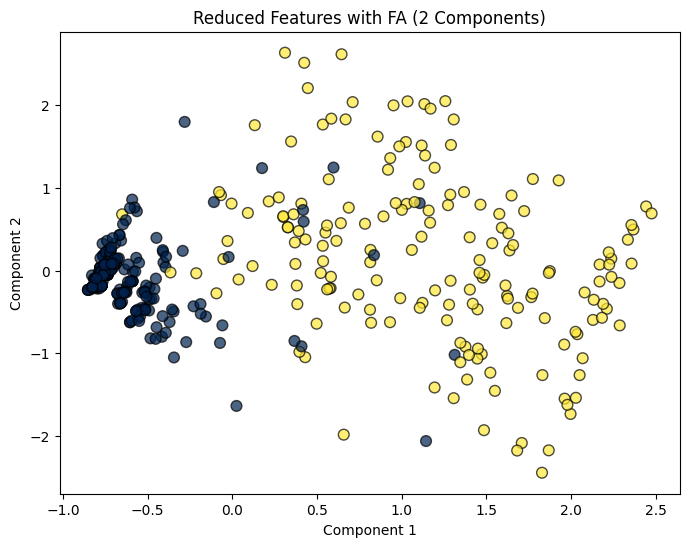

In [20]:
# Visualizing the reduced features (2 components) after FA
import matplotlib.pyplot as plt

# Create a 2D scatter plot for the reduced features
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_train_fa[:, 0], X_train_fa[:, 1], c=y_train.values, cmap='cividis', edgecolors='k', alpha=0.7, s=60)

# Add labels and title to the plot
ax.set_title('Reduced Features with FA (2 Components)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

# Show the plot
plt.show()


## 6. Train the SVM Model
Train an SVM classifier with a linear kernel on the reduced feature set after FA.


In [21]:
from sklearn.svm import SVC

# Train an SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_fa, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=42)

### 6.2 Evaluate the Model
Evaluate the trained SVM model by predicting the test set and printing the accuracy and classification report.

In [22]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test data
y_pred = svm_model.predict(X_test_fa)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Accuracy: 96.19%
              precision    recall  f1-score   support

           2       0.97      0.98      0.97       143
           4       0.95      0.93      0.94        67

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210



### 6.3 Visualize the SVM Decision Boundary

Visualize the SVM decision boundary in the reduced feature space (after FA) to understand how the SVM classifier divides the data.


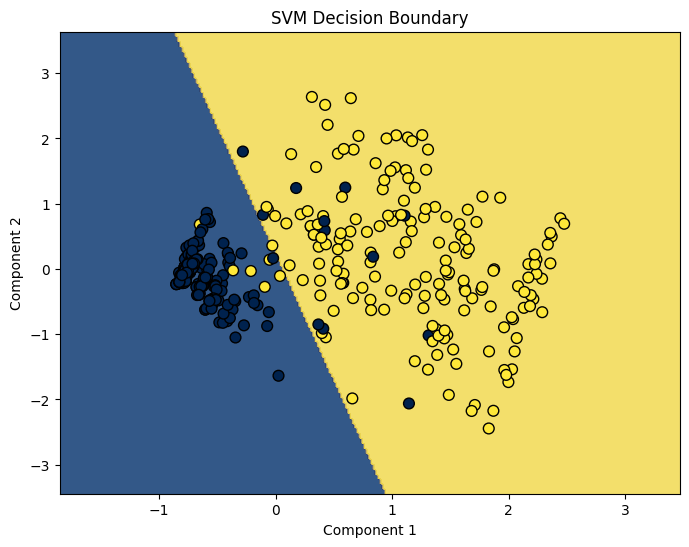

In [26]:
# Plot SVM decision boundary in the reduced feature space
import numpy as np # Import numpy and assign it to the alias 'np'
import matplotlib.pyplot as plt

# Plot SVM decision boundary in the reduced feature space
plt.figure(figsize=(8, 6))
h = .02  # Step size in the mesh
x_min, x_max = X_train_fa[:, 0].min() - 1, X_train_fa[:, 0].max() + 1
y_min, y_max = X_train_fa[:, 1].min() - 1, X_train_fa[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='cividis')
plt.scatter(X_train_fa[:, 0], X_train_fa[:, 1], c=y_train.values, cmap='cividis', edgecolors='k', s=60)
plt.title('SVM Decision Boundary')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


## 7. PCA to reduce dimensions to 2 components

In [27]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)


### 7.2 Use SVM on PCA reduced space

In [28]:
# Train SVM model using the reduced features with 2 PCA components
svm_model_pca = SVC(kernel='linear', random_state=42)
svm_model_pca.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_pca = svm_model_pca.predict(X_test_pca)

# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with 2 PCA components: {accuracy_pca * 100:.2f}%")
print(classification_report(y_test, y_pred_pca))


Accuracy with 2 PCA components: 96.67%
              precision    recall  f1-score   support

           2       0.98      0.97      0.98       143
           4       0.94      0.96      0.95        67

    accuracy                           0.97       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


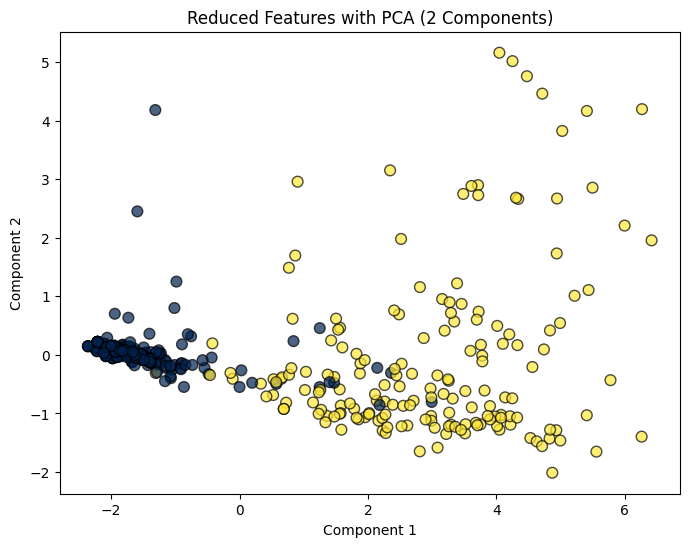

In [29]:
# Visualize the reduced features (2 components) after PCA
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.values, cmap='cividis', edgecolors='k', alpha=0.7, s=60)

# Add labels and title to the plot
ax.set_title('Reduced Features with PCA (2 Components)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

# Show the plot
plt.show()


In [30]:
# Apply PCA to reduce dimensions to 3 components
pca_3 = PCA(n_components=3)
X_train_pca_3 = pca_3.fit_transform(X_train_imputed)
X_test_pca_3 = pca_3.transform(X_test_imputed)


In [31]:
# Train SVM model using the reduced features with 3 PCA components
svm_model_pca_3 = SVC(kernel='linear', random_state=42)
svm_model_pca_3.fit(X_train_pca_3, y_train)

# Make predictions on the test set
y_pred_pca_3 = svm_model_pca_3.predict(X_test_pca_3)

# Evaluate the model
accuracy_pca_3 = accuracy_score(y_test, y_pred_pca_3)
print(f"Accuracy with 3 PCA components: {accuracy_pca_3 * 100:.2f}%")
print(classification_report(y_test, y_pred_pca_3))


Accuracy with 3 PCA components: 97.14%
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       143
           4       0.96      0.96      0.96        67

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


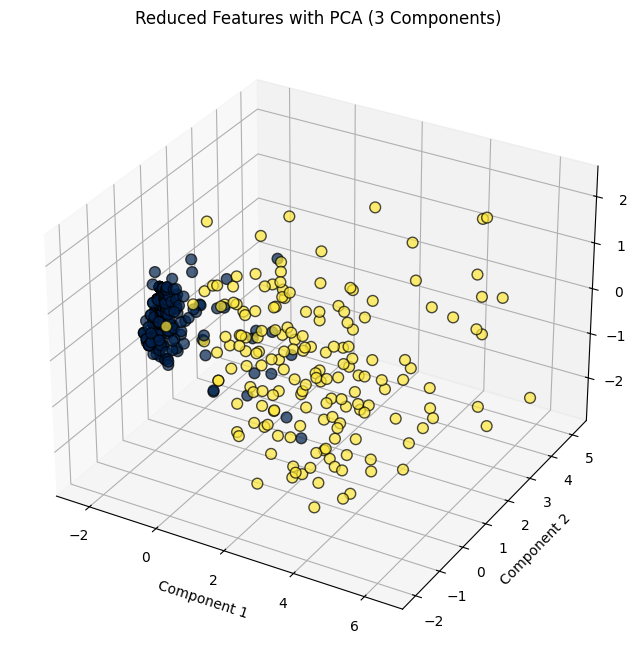

In [32]:
# Visualize the reduced features (3 components) after PCA in 3D plot
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for the reduced features with 3 components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first three components
ax.scatter(X_train_pca_3[:, 0], X_train_pca_3[:, 1], X_train_pca_3[:, 2], c=y_train.values, cmap='cividis', edgecolors='k', alpha=0.7, s=60)

# Add labels and title to the plot
ax.set_title('Reduced Features with PCA (3 Components)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Show the plot
plt.show()
